# Lab 4.02 - Bivariate Analysis of Qualitative Data

In [1]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

## Exercise 2 - NBA Salaries

The file NBA.csv contains annual salaries for all NBA basketball players in the season (2008–2009), check whether there is independence between position and salary. To do this, first change any hyphenated position such as C-F to 
the first listed, in this case C. (Presumably, this is 
the player's primary position.)     
Then remove $ and . in Annual Salary and make Annual Salary categorical with four categories: the first is all salaries below the first quartile, the second is all salaries from the first quartile to the median, and so on.  
First make a plot

Results of the main calculations:
  - χ² ≈ 3.0344 
  - p-value = 0.8045
  - We do not reject H0


  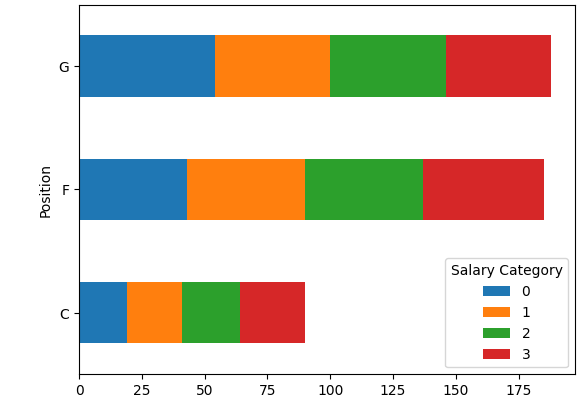

In [64]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/NBA.csv', sep=";")

df['Position'] = df['Position'].str[0]
df['Annual Salary'] = df['Annual Salary'].str.replace('$', '').str.replace('.', '').astype('int64')

q = df['Annual Salary'].quantile([0.25,0.50,0.75])

def sal_to_category(sal):
    if sal < q[0.25]:
        return "1"
    elif sal >= q[0.25] and sal <  q[0.5]:
        return "2"
    elif sal >=  q[0.5] and sal < q[0.75]:
        return "3"
    else:
        return "4"

df['Salary Cat'] = df['Annual Salary'].map(sal_to_category)
df.head()

,Player,Team,Position,Annual Salary,Contract Yrs,Contract Amt,Contract Thru,Salary Cat
0,"Bibby, Mike",Atlanta Hawks,G,14983603,1,$14.983.603,2008-09,4
1,"Johnson, Joe",Atlanta Hawks,G,14232566,5,$70.000.000,2009-10,4
2,"Smith, Josh",Atlanta Hawks,F,10000000,5,$58.000.000,2012-13,4
3,"Claxton, Speedy",Atlanta Hawks,G,5757818,4,$25.000.000,2010-11,3
4,"Williams, Marvin",Atlanta Hawks,F,5636142,4,$18.160.000,2008-09(t),3


<Axes: ylabel='Position'>

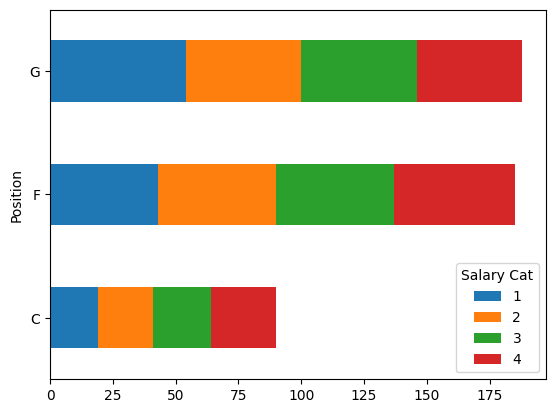

In [67]:
#  Stacked bar chart

# Contingency table without the margins
observed = pd.crosstab(df['Position'], df['Salary Cat'])

# Horizontally oriented stacked bar chart
observed.plot(kind='barh', stacked=True)

In [69]:

alpha=0.01                         # significance level 
 
chi2, p, dof, expected = stats.chi2_contingency(observed)
g = stats.chi2.isf(alpha, df=dof)  # Critical value
print("Chi-squared   χ² = %.4f" % chi2)
print("Critical value g = %.4f" % g)
print("p-value        p = %f"   % p)

Chi-squared   χ² = 3.0344
Critical value g = 16.8119
p-value        p = 0.804522


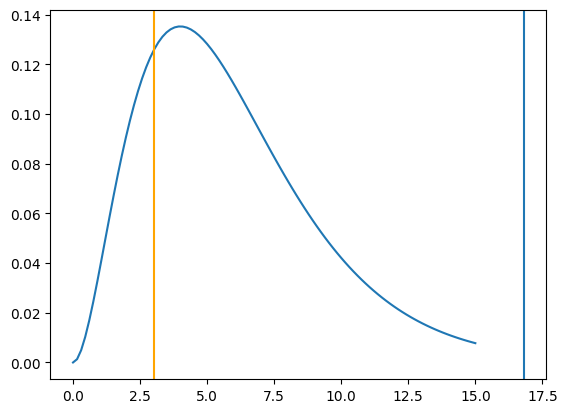

In [72]:
# Is there an association between Gender and Survey?

# x-values:
x = np.linspace(0, 15, num=100)
# probability density of the chi-squared distribution with 4 degrees of freedom
y = stats.chi2.pdf(x, df=dof)

# the number q for which the right tail probability is exactly 5%:
q = stats.chi2.isf(alpha, df=dof)  # TODO: CHECK this!

fig, tplot = plt.subplots(1, 1)
tplot.plot(x, y)                     # probability density
tplot.fill_between(x, y, where=x>=q, # critical area
    color='lightblue')
tplot.axvline(q)                     # critical value
tplot.axvline(chi2, color='orange')  # chi-squared

In [71]:
if chi2 < g:
    print("do not reject H0")

if p > alpha:
    print("do not reject H0")    

do not reject
do not reject
